# Heart Failure Analysis
Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://cms.master.school/final-project-jan23)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page

## The story behind The Data

Cardiovascular diseases (CVDs) are the number 1 cause of death all over the world, taking an estimated **17.9** million lives each year, which accounts for 31% of all deaths worldwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure, as well as analyze and understand the main factor for these diseases.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with CV disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a great analysis of it can be of great help.

**A full ERD can be found [here](https://dbdiagram.io/d/638ce6b2bae3ed7c4544a01b)**

# Data Description
In this task, few datasets are provided:

1. **`base_metrics_patient.csv`** - the base DF which contains the main metrics measured per each patient, these are:
 
	- `uniqueID` - patient ID
	- `smoking` - If the patient smokes or not (boolean)
    - `ejection_fraction` - Percentage of blood leaving the heart at each contraction (%)
	- `serum_sodium` - Level of serum sodium in the blood (mEq/L)
	- `platelets` - Platelets in the blood (kiloplatelets/mL)
	- `creatinine_phosphokinase` - Level of the CPK enzyme in the blood (mcg/L)
	- `diabetes` - If the patient has diabetes (boolean)
	- `serum_creatinine` - Level of serum creatinine in the blood (mg/dL)
2. **`blood_metrics_df.csv`** - an additional dataset contains some more metrics about each patient. Specifically, it contains:
    - `uniqueID` - patient ID
    - `anaemia` - Decrease of red blood cells or hemoglobin (boolean)
    - `high_blood_pressure` - If the patient has hypertension (boolean)
3. **`demographic_data_health.csv`** - some extra data about the patient’s demographics, specifically:
    - `uniqueID` - patient ID
    - `age` - patient’s age
    - `sex` - (male - 1, female - 0)
4. **`follow_up_df.csv` -** a dataset contains details about a follow up check that was with that patient. It contains:
    - `uniqueID` - patient ID
    - `time` - time passed (in days) between the measurement date (see dataset #1) until that “follow up” date
    - `DEATH_EVENT` - If the patient deceased during the follow-up period (boolean)

# SQL tasks

1. How many death cases do we have in this dataset?
2. Per each sex (M, F), show the amount of “death” records in the data
3. Calculate the following statistics for serum_creatinine, per each anaemia category -
    1. min, max, average, range
4. Let’s define a new metric - almost_outlier. An “almost_outlier” is a value which its serum_creatinine is higher than the overall serum_creatinine average, by 1.5. How many “almost_outlier” do we have in our dataset?**  
5. Per each gender + smoker category, find out the min, max and mean of creatinine_phosphokinase
6. Let’s define a new variable called age_group:
    1. 10 < x ≤ 50
    2. 50 < x ≤ 70
    3. 70 < x ≤ 80
    4. 80 < x ≤ 120
    
    Per each age_group, find out:
    
    - Out of persons in each group, what’s the % of smokers are there. Make sure to round the answer up to 4 decimal points
    - how many patients with high_blood_pressure out there
    - what is the avg. level of serum_sodium. Make sure to round the answer up to 4 decimal points
7. Using the age_group column from above, some hospitals are interested to know who are the top 10 patient ID with the highest serum_creatinine. Help them find that information

8. Let’s create a new variable called “general_serum”, composed of a multiplication between serum_sodium and serum_creatinine, and divided by 100 (a_multiply_b / 100). Once created, per each smoking + diabetes level (boolean variable), some hospitals would like to know the patient IDs with the lowest level of that new metric. As such, please generate a table of smoking + diabetes, as well as the bottom 5 patient IDs, with the lowest level of “general_serum”

In [148]:
-- Start writing your SQL query here 

SELECT * from base_metrics_patient LIMIT 10

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueid,diabetes,serum_creatinine,almost_outlier
0,1,45,139,362000,129,159,0,1.1,False
1,0,60,140,304000,68,87,1,0.8,False
2,0,40,139,235000,84,88,1,0.7,False
3,0,25,144,181000,115,89,0,1.1,False
4,1,45,136,249000,66,90,1,0.8,False
5,1,35,136,255000,90,242,0,1.1,False
6,0,40,141,220000,1185,243,0,0.9,False
7,0,35,139,133000,320,291,0,1.4,False
8,0,30,132,329000,482,142,1,0.9,False
9,0,40,141,229000,84,143,0,0.9,False


In [149]:
SELECT* FROM blood_metrics_df lIMIT 10;

,uniqueid,anaemia,high_blood_pressure
0,0,0,1
1,1,0,0
2,2,0,0
3,3,1,0
4,4,1,0
5,5,1,1
6,6,1,0
7,7,1,0
8,8,0,0
9,9,1,1


In [150]:
SELECT * FROM demographic_data LIMIT 10

,uniqueid,age,sex,age_group
0,127,58,0,50 - 70
1,128,61,1,50 - 70
2,129,53,1,50 - 70
3,130,53,1,50 - 70
4,131,60,1,50 - 70
5,132,46,0,10 - 50
6,133,63,1,50 - 70
7,134,81,1,80 - 120
8,135,75,1,70 - 80
9,136,65,0,50 - 70


In [151]:
SELECT * FROM follow_up_df 

,uniqueid,time,death_event
0,0,4,1
1,1,6,1
2,2,7,1
3,3,7,1
4,4,8,1
...,...,...,...
294,294,270,0
295,295,271,0
296,296,278,0
297,297,280,0


## 1. How many death cases do we have in this dataset?

In [152]:
SELECT 
       COUNT(CASE WHEN death_event = 1 THEN 'yes' END) as YES,
            COUNT(CASE WHEN death_event = 0 THEN 'no' END) as NO
  FROM follow_up_df

,yes,no
0,96,203


## 2. Per each sex (M, F), show the amount of “death” records in the data

In [153]:
WITH death AS
(SELECT 
       COUNT(CASE WHEN death_event = 1 THEN 'yes' END) as YES,
            COUNT(CASE WHEN death_event = 0 THEN 'no' END) as NO 
  FROM follow_up_df )

SELECT death_event, 
       COUNT(CASE WHEN sex = 1 THEN 'male' END) as MALE,
            COUNT(CASE WHEN sex = 0 THEN 'female' END) as FEMALE 
  FROM demographic_data dd
  JOIN follow_up_df fud
  ON dd.uniqueid = fud.uniqueid
  GROUP BY 1

,death_event,male,female
0,1,62,34
1,0,132,71


In [154]:
SELECT demographic_data.sex, COUNT(*) as death_count
FROM demographic_data
JOIN follow_up_df ON demographic_data.uniqueID = follow_up_df.uniqueID
WHERE follow_up_df.DEATH_EVENT = 1
GROUP BY demographic_data.sex

,sex,death_count
0,0,34
1,1,62


## 3. Calculate the following statistics for serum_creatinine, per each anemia category: min, max, average, range

In [155]:
WITH 
   anemia_stats AS (
      SELECT 
             MIN(bm.serum_creatinine) AS min_serum_creatinine,
             MAX(bm.serum_creatinine) AS max_serum_creatinine,
             AVG(bm.serum_creatinine) AS avg_serum_creatinine
      FROM base_metrics_patient bm
      JOIN blood_metrics_df bd
        ON bm.uniqueid = bd.uniqueid
      
   )
SELECT 
       min_serum_creatinine,
       max_serum_creatinine,
       avg_serum_creatinine,
       (max_serum_creatinine - min_serum_creatinine) AS range_serum_creatinine
FROM anemia_stats ans


,min_serum_creatinine,max_serum_creatinine,avg_serum_creatinine,range_serum_creatinine
0,0.5,9.4,1.39388,8.9


In [156]:
SELECT 
bmd.anaemia, 
MIN(bm.serum_creatinine) as min_serum_creatinine,
MAX(bm.serum_creatinine) as max_serum_creatinine,
AVG(bm.serum_creatinine) as avg_serum_creatinine,
MAX(bm.serum_creatinine)-MIN(bm.serum_creatinine) as range_serum_creatinine
FROM base_metrics_patient bm
JOIN blood_metrics_df bmd
ON bm.uniqueID = bmd.uniqueID
GROUP BY 1;

,anaemia,min_serum_creatinine,max_serum_creatinine,avg_serum_creatinine,range_serum_creatinine
0,0,0.5,6.8,1.346941,6.3
1,1,0.6,9.4,1.455736,8.8


In [157]:
SELECT
CASE WHEN anaemia = 1 THEN 'Has anemia'
WHEN anaemia = 0 THEN 'Non anemia' END as anemia, 
MIN(bm.serum_creatinine) as min_serum_creatinine,
MAX(bm.serum_creatinine) as max_serum_creatinine,
AVG(bm.serum_creatinine) as avg_serum_creatinine,
MAX(bm.serum_creatinine)-MIN(bm.serum_creatinine) as range_serum_creatinine
FROM base_metrics_patient bm
JOIN blood_metrics_df bmd
ON bm.uniqueID = bmd.uniqueID
GROUP BY 1;

,anemia,min_serum_creatinine,max_serum_creatinine,avg_serum_creatinine,range_serum_creatinine
0,Non anemia,0.5,6.8,1.346941,6.3
1,Has anemia,0.6,9.4,1.455736,8.8


## 4. Let’s define a new metric - almost_outlier. An “almost_outlier” is a value whose serum_creatinine is higher than the overall serum_creatinine average by 1.5. How many “almost_outlier” do we have in our dataset? 

In [158]:
SELECT COUNT(*) AS almost_outlier 
FROM base_metrics_patient
WHERE serum_creatinine > (SELECT AVG(serum_creatinine) FROM base_metrics_patient) * 1.5 

,almost_outlier
0,34


## 5. Per each gender + smoker category, find out the min, max, and mean of creatinine_phosphokinase

In [159]:
SELECT 
CASE WHEN smoking = 1 THEN 'smoker'
    WHEN smoking = 0 THEN 'non_smoker'
    END AS smoker,
CASE WHEN sex = 1 THEN 'male'
    WHEN sex = 0 THEN 'female'
    END as Gender,
    MIN(creatinine_phosphokinase) AS min_crt_ppk,
    MAX(creatinine_phosphokinase) AS max_crt_ppk,
    AVG(creatinine_phosphokinase) AS avg_crt_ppk
FROM base_metrics_patient bm
JOIN demographic_data dd
ON dd.uniqueid = bm.uniqueid
GROUP BY 1, 2


,smoker,gender,min_crt_ppk,max_crt_ppk,avg_crt_ppk
0,non_smoker,male,23,7861,671.843137
1,smoker,female,92,328,201.000000
2,non_smoker,female,52,3964,487.702970
3,smoker,male,47,5882,601.956522


In [160]:
SELECT smoking,
    MIN(creatinine_phosphokinase) AS min_crt_ppk,
    MAX(creatinine_phosphokinase) AS max_crt_ppk,
    AVG(creatinine_phosphokinase) AS avg_crt_ppk
FROM base_metrics_patient
GROUP BY 1;

,smoking,min_crt_ppk,max_crt_ppk,avg_crt_ppk
0,0,23,7861,580.226601
1,1,47,5882,585.250000


In [161]:
SELECT 
CASE WHEN sex = 1 THEN 'male'
    WHEN sex = 0 THEN 'female'
    END as Gender,
    MIN(creatinine_phosphokinase) AS min_crt_ppk,
    MAX(creatinine_phosphokinase) AS max_crt_ppk,
    AVG(creatinine_phosphokinase) AS avg_crt_ppk
FROM base_metrics_patient bm
JOIN demographic_data dd
ON dd.uniqueid = bm.uniqueid
GROUP BY 1

,gender,min_crt_ppk,max_crt_ppk,avg_crt_ppk
0,female,52,3964,476.780952
1,male,23,7861,638.701031


## 6. Let’s define a new variable called age_group:

10 > x ≤ 50

50 > x ≤ 70

70 > x ≤ 80

80 > x ≤ 120

Per each age_group, find out: Out of the persons in each group, what’s the % of smokers there? Make sure to round the answer up to 4 decimal points

How many patients with high_blood_pressure out there?
What the avg level of serum_sodium is? Make sure to round the answer up to 4 decimal points.


In [162]:
SELECT 
    age,
    CASE 
        WHEN age > 10 AND age <= 50 THEN '10-50'
        WHEN age > 50 AND age <= 70 THEN '50-70'
        WHEN age > 70 AND age <= 80 THEN '70-80'
        WHEN age > 80 AND age <= 120 THEN '80-120'
    END as age_group
FROM demographic_data;

,age,age_group
0,58,50-70
1,61,50-70
2,53,50-70
3,53,50-70
4,60,50-70
...,...,...
294,45,10-50
295,65,50-70
296,50,10-50
297,60,50-70


### - Out of the persons in each group, what’s the % of smokers there? Make sure to round the answer up to 4 decimal points

In [163]:
SELECT 
    CASE 
            WHEN age > 10 AND age <= 50 THEN '10-50'
            WHEN age > 50 AND age <= 70 THEN '50-70'
            WHEN age > 70 AND age <= 80 THEN '70-80'
            WHEN age > 80 AND age <= 120 THEN '80-120'
        END as age_group, 
        ROUND((AVG(smoking)*100), 4) as percentage_smokers
FROM base_metrics_patient bm
JOIN demographic_data dd
ON bm.uniqueid = dd.uniqueid
GROUP BY age_group, age    
ORDER BY age_group

,age_group,percentage_smokers
0,10-50,25.0000
1,10-50,0.0000
2,10-50,100.0000
3,10-50,0.0000
4,10-50,50.0000
5,10-50,33.3333
6,10-50,42.8571
7,10-50,15.7895
8,10-50,28.5714
9,10-50,0.0000


### - Out of the persons in each group, what’s the % of smokers there? Make sure to round the answer up to 4 decimal points
### - how many patients with high_blood_pressure out there
### - what the avg level of serum_sodium is? Make sure to round the answer up to 4 decimal points.


In [164]:
SELECT
ROUND(SUM(smoking)* 100/ (SELECT SUM(smoking) FROM base_metrics_patient)) AS percent_smoking,
SUM(high_blood_pressure) AS high_blood_pressure,
ROUND(AVG(serum_sodium)) AS avg_serum_sodium,
CASE
WHEN age BETWEEN 10 AND 50 THEN '10-50'
WHEN age BETWEEN 50 AND 70 THEN '50-70'
WHEN age BETWEEN 70 AND 80 THEN '70-80'
WHEN age BETWEEN 80 AND 120 THEN '80-120'
END AS ages
FROM demographic_data d
JOIN base_metrics_patient b
ON d.uniqueid = b.uniqueid
JOIN blood_metrics_df bm
ON b.uniqueid = bm.uniqueid
GROUP BY ages
ORDER BY ages

,percent_smoking,high_blood_pressure,avg_serum_sodium,ages
0,20,24,136,10-50
1,61,58,137,50-70
2,12,19,136,70-80
3,5,4,136,80-120


## 7. Using the age_group column from above, some hospitals are interested to know the top 10 patient IDs with the highest serum creatinine. Help them find that information.


In [165]:
WITH age_group_table AS (
SELECT
uniqueid,
age,
CASE
WHEN age BETWEEN 10 AND 50 THEN '10-50'
WHEN age BETWEEN 50 AND 70 THEN '50-70'
WHEN age BETWEEN 70 AND 80 THEN '70-80'
WHEN age BETWEEN 80 AND 120 THEN '80-120'
END as age_group
FROM demographic_data
),

ranked_data AS (
SELECT
base_metrics_patient.uniqueid,
age_group,
serum_creatinine,
ROW_NUMBER() OVER (PARTITION BY age_group ORDER BY serum_creatinine DESC) as creatinine_rank
FROM age_group_table
JOIN base_metrics_patient
ON age_group_table.uniqueID = base_metrics_patient.uniqueID
)

SELECT uniqueid, age_group, serum_creatinine
FROM ranked_data
WHERE creatinine_rank <= 10
ORDER BY age_group ASC, creatinine_rank;






,uniqueid,age_group,serum_creatinine
0,282,10-50,3.80
1,61,10-50,2.30
2,126,10-50,2.10
3,45,10-50,1.90
4,3,10-50,1.90
5,19,10-50,1.90
6,298,10-50,1.60
7,194,10-50,1.60
8,270,10-50,1.60
9,112,10-50,1.60


## 8. Let’s create a new variable called “general_serum”, composed of multiplication between serum_sodium and serum_creatinine, divided by 100. 

## Once created, per each smoking + diabetes level (boolean variable), some hospitals would like to know the patient IDs with the lowest level of that new metric. As such, please generate a table of smoking + diabetes, as well as the bottom five patient IDs, with the lowest level of “general_serum”


In [166]:
WITH general_serum_table AS (
    SELECT 
        uniqueID, 
        smoking, 
        diabetes,
        (serum_sodium * serum_creatinine) / 100 as general_serum
    FROM base_metrics_patient
)

SELECT 
    uniqueID, 
    smoking, 
    diabetes, 
    general_serum
FROM general_serum_table
ORDER BY general_serum ASC
LIMIT 5;


,uniqueid,smoking,diabetes,general_serum
0,250,0,0,0.695
1,78,1,1,0.786
2,186,0,0,0.804
3,57,1,0,0.828
4,47,1,1,0.828


In [167]:
WITH total_smokers_over_70 AS (
    SELECT COUNT(*) as total_smokers
    FROM base_metrics_patient 
    JOIN demographic_data 
    ON base_metrics_patient.uniqueID = demographic_data.uniqueID
    WHERE smoking = 1 AND age > 70
),
smokers_over_70_who_died AS (
    SELECT COUNT(*) as smokers_who_died
    FROM base_metrics_patient 
    JOIN demographic_data 
    ON base_metrics_patient.uniqueID = demographic_data.uniqueID
    JOIN follow_up_df
    ON base_metrics_patient.uniqueID = follow_up_df.uniqueID
    WHERE smoking = 1 AND age > 70 AND death_event = 1
)
SELECT ROUND(smokers_who_died * 100.0 / total_smokers, 4) as percentage_smokers_who_died
FROM total_smokers_over_70, smokers_over_70_who_died;


,percentage_smokers_who_died
0,64.7059


## Tableau tasks

This Tableau task lets you be creative with the way you build your dashboard and only gives guidance on the types of visualisations you should use.

Create a dashboard that will contain at least 5 out of the 8 requirements defined below:

1. **At least 2 KPIs** as Big Ass Numbers. Choose the metrics on your own that will fit with the rest of your analysis. Examples of metrics:
    - % of patients that died
    - % of smokers out of patients that died
    - % of smokers out of patients that died older than 70 y/o
    - etc.
2. **A Bar Chart**, for example, comparing one or more patient characteristics and the corresponding amount of patients who died or didn’t die, smoker or non-smokers, diabetic or not diabetic. 
3. **A Bar Chart using Quick Table Calculation**, for example, for each combination of patient characteristics comparing the % of smokers and non-smokers, patients that die or didn’t die, etc.
4. **A Highlight Table (Heatmap)**, for example, between age group and smoking flag, where each cell corresponds to either absolute or % of Total patients. By building two such heatmaps you can compare the “distribution” for patients that die and didn’t die.
5. **A Top N list of patient IDs** based on a chosen metric (creatine levels, sodium levels, etc.) including various Context Filters (age, smoker, etc.). 
6. **A Top N list of patient segments** by the % of deaths. For example, out of all non-diabetic smokers with high blood pressure, what percentage of patients died? Sort the segments by this percentage descendingly and allow for selecting Top N, if relevant, or keep the full list, if you see fit.
7. **At least 1 parameter** that allows dashboard user to interact with the dashboard.
8. At least **1 more visualization of your choice** adding value to your analysis.

# Heart Failure Analysis [Tableau](https://public.tableau.com/views/HeartFailureAnalysisBook/HeartFailureAnalysis?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

https://public.tableau.com/trusted/nKSDkO2vT7mUPs-FMI2pyw==:fS1bET7AJyS8YgbOlec-RawX?:redirUrl=%2Fprofile%2Fapi%2Fpublish%2FHeartFailureAnalysisBook%2FHeartFailureAnalysis

Please click the link to open Tableau (tableau was having problems when I loaded the information so I shared two different links just in case)

_Use this cell to add your Tableau links. We encourage you also to add here screenshots from your Tableau dashboard with explanations._

_For_ deep dive analysis and EDA follow the guidelines on project [Page](https://cms.master.school/final-project-jan23)

In [168]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
# loading datasets and see their "head"
base_metrics_patient_df = pd.read_csv("base_metrics_patient.csv")
blood_metrics_df = pd.read_csv("blood_metrics_df.csv")
demographic_df = pd.read_csv("demographic_data_health.csv") 

follow_up_df = pd.read_csv("follow_up_df.csv")

# Base metric patient

In [170]:
base_metrics_patient_df.head(3)
#blood_metrics_df.head(3)
#demographic_df.head(3)
#follow_up_df.head(3)

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine
0,0,20,130,265000.00,582,0,0,1.9
1,0,38,136,263358.03,7861,1,0,1.1
2,1,20,129,162000.00,146,2,0,1.3


In [171]:
base_metrics_patient_df.tail(3)

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine
296,0,60,138,742000.0,2060,296,1,0.8
297,1,38,140,140000.0,2413,297,0,1.4
298,1,45,136,395000.0,196,298,0,1.6


In [172]:
base_metrics_patient_df.sample(5)

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine
266,1,20,134,263358.03,1199,266,0,1.83
50,0,25,138,166000.00,577,50,0,1.00
85,0,50,140,406000.00,78,85,0,0.70
20,0,25,137,276000.00,52,20,0,1.30
84,0,25,141,302000.00,280,84,1,1.00


In [173]:
base_metrics_patient_df.shape

(299, 8)

In [174]:
base_metrics_patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   smoking                   299 non-null    int64  
 1   ejection_fraction         299 non-null    int64  
 2   serum_sodium              299 non-null    int64  
 3   platelets                 299 non-null    float64
 4   creatinine_phosphokinase  299 non-null    int64  
 5   uniqueID                  299 non-null    int64  
 6   diabetes                  299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 18.8 KB


In [175]:
base_metrics_patient_df.describe()

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine
count,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000
mean,0.32107,38.083612,136.625418,263358.029264,581.839465,149.000000,0.418060,1.39388
std,0.46767,11.834841,4.412477,97804.236869,970.287881,86.458082,0.494067,1.03451
min,0.00000,14.000000,113.000000,25100.000000,23.000000,0.000000,0.000000,0.50000
25%,0.00000,30.000000,134.000000,212500.000000,116.500000,74.500000,0.000000,0.90000
50%,0.00000,38.000000,137.000000,262000.000000,250.000000,149.000000,0.000000,1.10000
75%,1.00000,45.000000,140.000000,303500.000000,582.000000,223.500000,1.000000,1.40000
max,1.00000,80.000000,148.000000,850000.000000,7861.000000,298.000000,1.000000,9.40000


In [176]:
base_metrics_patient_df.duplicated().sum()

0

In [177]:
base_metrics_patient_df.isnull().sum()

smoking                     0
ejection_fraction           0
serum_sodium                0
platelets                   0
creatinine_phosphokinase    0
uniqueID                    0
diabetes                    0
serum_creatinine            0
dtype: int64

# Blood metric

In [178]:
blood_metrics_df.head(3)

,unqiueID,anaemia,high_blood_pressure
0,0,0,1
1,1,0,0
2,2,0,0


In [179]:
blood_metrics_df.tail(3)

,unqiueID,anaemia,high_blood_pressure
296,296,0,0
297,297,0,0
298,298,0,0


In [180]:
blood_metrics_df.sample(5)

,unqiueID,anaemia,high_blood_pressure
83,83,1,1
140,140,0,0
19,19,1,0
111,111,0,0
233,233,1,0


In [181]:
blood_metrics_df.shape

(299, 3)

In [182]:
blood_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   unqiueID             299 non-null    int64
 1   anaemia              299 non-null    int64
 2   high_blood_pressure  299 non-null    int64
dtypes: int64(3)
memory usage: 7.1 KB


In [183]:
blood_metrics_df.describe()

,unqiueID,anaemia,high_blood_pressure
count,299.000000,299.000000,299.000000
mean,149.000000,0.431438,0.351171
std,86.458082,0.496107,0.478136
min,0.000000,0.000000,0.000000
25%,74.500000,0.000000,0.000000
50%,149.000000,0.000000,0.000000
75%,223.500000,1.000000,1.000000
max,298.000000,1.000000,1.000000


In [184]:
blood_metrics_df.duplicated().sum()

0

In [185]:
blood_metrics_df.isnull().sum()

unqiueID               0
anaemia                0
high_blood_pressure    0
dtype: int64

# Demographic Data

In [186]:
demographic_df.head(3)

,uniqueID,age,sex
0,0,75.0,1
1,1,55.0,1
2,2,65.0,1


In [187]:
demographic_df.tail(3)

,uniqueID,age,sex
296,296,45.0,0
297,297,45.0,1
298,298,50.0,1


In [188]:
demographic_df.sample(5)

,uniqueID,age,sex
192,192,50.0,1
27,27,70.0,1
1,1,55.0,1
183,183,75.0,1
165,165,80.0,0


In [189]:
demographic_df.shape

(299, 3)

In [190]:
demographic_df.describe()

,uniqueID,age,sex
count,299.000000,299.000000,299.000000
mean,149.000000,60.833893,0.648829
std,86.458082,11.894809,0.478136
min,0.000000,40.000000,0.000000
25%,74.500000,51.000000,0.000000
50%,149.000000,60.000000,1.000000
75%,223.500000,70.000000,1.000000
max,298.000000,95.000000,1.000000


In [191]:
demographic_df.isnull().sum()

uniqueID    0
age         0
sex         0
dtype: int64

In [192]:
demographic_df.age.unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

# Follow up

In [193]:
follow_up_df.head(3)

,uniqueID,time,DEATH_EVENT
0,0,4,1
1,1,6,1
2,2,7,1


In [194]:
follow_up_df.tail(3)

,uniqueID,time,DEATH_EVENT
296,296,278,0
297,297,280,0
298,298,285,0


In [195]:
follow_up_df.sample(5)

,uniqueID,time,DEATH_EVENT
203,203,187,0
105,105,88,1
50,50,43,1
280,280,247,0
159,159,121,0


In [196]:
follow_up_df.shape

(299, 3)

In [197]:
follow_up_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   uniqueID     299 non-null    int64
 1   time         299 non-null    int64
 2   DEATH_EVENT  299 non-null    int64
dtypes: int64(3)
memory usage: 7.1 KB


In [198]:
follow_up_df.describe()

,uniqueID,time,DEATH_EVENT
count,299.000000,299.000000,299.00000
mean,149.000000,130.260870,0.32107
std,86.458082,77.614208,0.46767
min,0.000000,4.000000,0.00000
25%,74.500000,73.000000,0.00000
50%,149.000000,115.000000,0.00000
75%,223.500000,203.000000,1.00000
max,298.000000,285.000000,1.00000


In [199]:
follow_up_df.duplicated().sum()

0

In [200]:
follow_up_df.isnull().sum()

uniqueID       0
time           0
DEATH_EVENT    0
dtype: int64

# Notes

- 299 patients for each dataset
- No missing values in any of the tables

# Assesing Data

- Change values that are supposed to be booleans (anaemia','diabetes','high_blood_pressure', 'smoking', 'DEATH_EVENT')
- Change sex variable name to female and male instead of 0 & 1
- Fix name of anaemia to anemia
- Change DEATH_EVENT name to death
- 
- Column 'uniqueID' on blood_metrics is misspelled (uniqueid)
- Merge all tables 

In [201]:
# Checking the dtypes as some of the values are representing a boolean but its represented as int64
base_metrics_patient_df.dtypes

smoking                       int64
ejection_fraction             int64
serum_sodium                  int64
platelets                   float64
creatinine_phosphokinase      int64
uniqueID                      int64
diabetes                      int64
serum_creatinine            float64
dtype: object

In [202]:
# How many females and males in this list of patients
demographic_df.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

In [203]:
# Number of patients with anemia
blood_metrics_df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

In [204]:
# Number of patients that smokes
base_metrics_patient_df.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

In [205]:
# Number of patients with diabetes
base_metrics_patient_df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

In [206]:
# Number of patients with high blood pressure
blood_metrics_df.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [207]:
# Number of patients dead
follow_up_df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

# Clean Data

In [208]:
# Create copies

base_metric = base_metrics_patient_df.copy()
blood_metric = blood_metrics_df.copy()
demographic_metric = demographic_df.copy()
follow_up_metric = follow_up_df.copy()

## 1. Change values that are supposed to be booleans 

- (anaemia','diabetes','high_blood_pressure', 'smoking', 'DEATH_EVENT')

In [209]:
#changing the data type of following columns to bool type on base_metric
base_metric[['diabetes', 'smoking']] = base_metric[['diabetes', 'smoking']].astype(bool)

In [210]:
base_metric.head()

,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine
0,False,20,130,265000.00,582,0,False,1.9
1,False,38,136,263358.03,7861,1,False,1.1
2,True,20,129,162000.00,146,2,False,1.3
3,False,20,137,210000.00,111,3,False,1.9
4,False,20,116,327000.00,160,4,True,2.7


In [211]:
base_metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   smoking                   299 non-null    bool   
 1   ejection_fraction         299 non-null    int64  
 2   serum_sodium              299 non-null    int64  
 3   platelets                 299 non-null    float64
 4   creatinine_phosphokinase  299 non-null    int64  
 5   uniqueID                  299 non-null    int64  
 6   diabetes                  299 non-null    bool   
 7   serum_creatinine          299 non-null    float64
dtypes: bool(2), float64(2), int64(4)
memory usage: 14.7 KB


In [212]:
#changing the data type of following columns to bool type on blood_metric
blood_metric[['anaemia', 'high_blood_pressure']] = blood_metric[['anaemia', 'high_blood_pressure']].astype(bool)


In [213]:
blood_metric.head()

,unqiueID,anaemia,high_blood_pressure
0,0,False,True
1,1,False,False
2,2,False,False
3,3,True,False
4,4,True,False


In [214]:
#changing the data type of following columns to bool type on follow_up_metric
follow_up_metric[['DEATH_EVENT']] = follow_up_metric[['DEATH_EVENT']].astype(bool)

In [215]:
follow_up_metric.head()

,uniqueID,time,DEATH_EVENT
0,0,4,True
1,1,6,True
2,2,7,True
3,3,7,True
4,4,8,True


##  2. Change sex variable name to female and male instead of 0 & 1

In [216]:
#changing the value of sex column to male or female
demographic_metric['sex'] = np.where(demographic_metric['sex'] == 1, 'Male','Female')

In [217]:
demographic_metric.sample(5)

,uniqueID,age,sex
253,253,70.0,Female
9,9,80.0,Male
111,111,55.0,Male
198,198,50.0,Female
88,88,44.0,Male


## 3. Fix name of anaemia to anemia

In [218]:
blood_metric.rename(columns={'anaemia': 'anemia'}, inplace=True)

In [219]:
blood_metric.head()

,unqiueID,anemia,high_blood_pressure
0,0,False,True
1,1,False,False
2,2,False,False
3,3,True,False
4,4,True,False


## 4. Change DEATH_EVENT name to death

In [220]:
follow_up_metric.rename(columns={'DEATH_EVENT': 'death'}, inplace=True)

In [221]:
follow_up_metric.sample(5)

,uniqueID,time,death
199,199,186,False
107,107,88,False
291,291,258,False
17,17,14,True
245,245,213,False


## 5. Column unique id is misspelled in blood_metric table

- Renamed the column for unification with all other uniqueid columns table

In [222]:
blood_metric.rename(columns={'unqiueID': 'uniqueID'}, inplace=True) 

In [223]:
blood_metric.head()

,uniqueID,anemia,high_blood_pressure
0,0,False,True
1,1,False,False
2,2,False,False
3,3,True,False
4,4,True,False


## 6. Create age bin 

In [224]:
# Create bins for age groups
bins = [10, 50, 70, 80, 120]

# Create labels for age groups
labels = ['10-50', '50-70', '70-80', '80-120']

# Create new column for age group
demographic_metric['age_group'] = pd.cut(demographic_metric['age'], bins=bins, labels=labels)

demographic_metric.sample(5)

,uniqueID,age,sex,age_group
129,129,53.0,Male,50-70
27,27,70.0,Male,50-70
61,61,50.0,Female,10-50
54,54,60.0,Female,50-70
63,63,45.0,Male,10-50


## Merge all tables

In [225]:
merged_df_1 = pd.merge(base_metric, blood_metric, on='uniqueID')

In [226]:
merged_df_2 = pd.merge(demographic_metric, merged_df_1, on='uniqueID')

In [227]:
final_merged_df = pd.merge(follow_up_metric, merged_df_2, on='uniqueID')

In [228]:
final_merged_df.head()

,uniqueID,time,death,age,sex,age_group,smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,diabetes,serum_creatinine,anemia,high_blood_pressure
0,0,4,True,75.0,Male,70-80,False,20,130,265000.00,582,False,1.9,False,True
1,1,6,True,55.0,Male,50-70,False,38,136,263358.03,7861,False,1.1,False,False
2,2,7,True,65.0,Male,50-70,True,20,129,162000.00,146,False,1.3,False,False
3,3,7,True,50.0,Male,10-50,False,20,137,210000.00,111,False,1.9,True,False
4,4,8,True,65.0,Female,50-70,False,20,116,327000.00,160,True,2.7,True,False


In [229]:
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   uniqueID                  299 non-null    int64   
 1   time                      299 non-null    int64   
 2   death                     299 non-null    bool    
 3   age                       299 non-null    float64 
 4   sex                       299 non-null    object  
 5   age_group                 299 non-null    category
 6   smoking                   299 non-null    bool    
 7   ejection_fraction         299 non-null    int64   
 8   serum_sodium              299 non-null    int64   
 9   platelets                 299 non-null    float64 
 10  creatinine_phosphokinase  299 non-null    int64   
 11  diabetes                  299 non-null    bool    
 12  serum_creatinine          299 non-null    float64 
 13  anemia                    299 non-null    bool    

# Exploratory Data Analysis & Visualization

In [230]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
#matplotlib.rcParams['figure.facecolor'] = 'white'

## Number of patients per Age Group

In [231]:
# Number of patients per each age group
final_merged_df.age_group.value_counts()

50-70     173
10-50      74
70-80      34
80-120     18
Name: age_group, dtype: int64

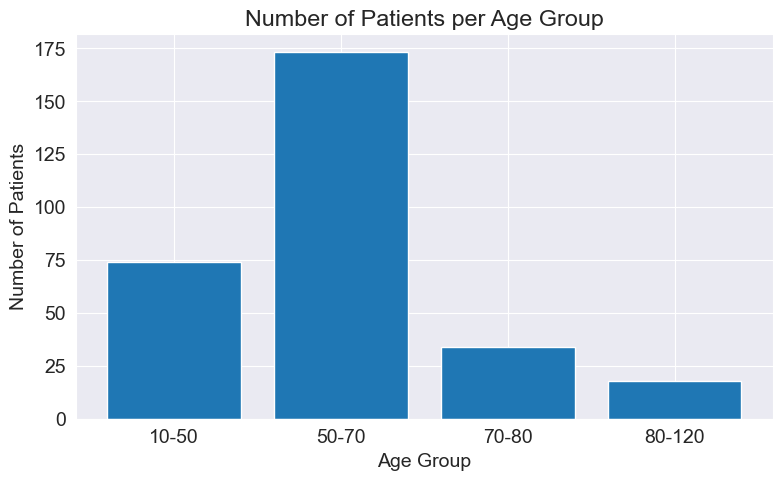

In [232]:
age_group_count = final_merged_df.groupby(['age_group']).size().reset_index(name='counts')

#  Histogram to represent the age_group and counts data
plt.bar(age_group_count['age_group'], age_group_count['counts'])
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Number of Patients per Age Group')
plt.show()

## Distribution of Age and what's the average age?

Text(0.5, 1.0, 'Distribution of Age')

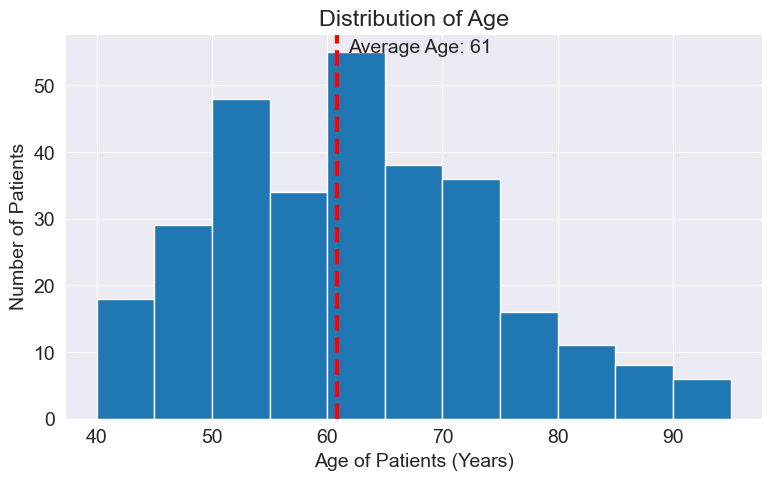

In [233]:
average_age = final_merged_df['age'].mean()
plt.axvline(average_age, color='r', linestyle='dashed', linewidth=3)

plt.text(average_age + 1, max(plt.hist(final_merged_df.age, bins=np.arange(40,100, 5),density=False)[0]), 'Average Age: {:.0f}'.format(average_age))
plt.xlabel("Age of Patients (Years)") 
plt.ylabel("Number of Patients")
plt.title("Distribution of Age" )
#plt.grid(False);

- We can see from the above histogram, that the majority of the patients with CVD's falls under the age of 60-65. We have another disfribution under the age of 50-55.
- The average age between the patients with heart failure in this dataset is 61 years old. 

## Gender Distribution

In [234]:
final_merged_df.sex.value_counts()

Male      194
Female    105
Name: sex, dtype: int64

In [235]:
# store the gender counts into a variable
gender_counts = final_merged_df.sex.value_counts()

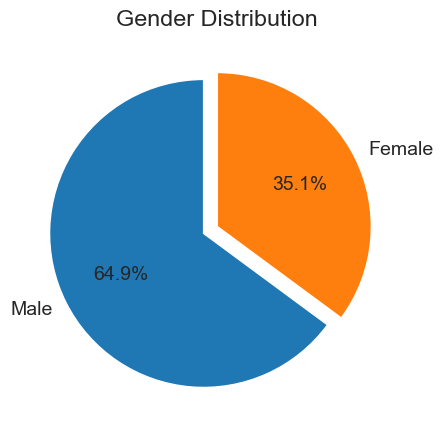

In [236]:
plt.figure(figsize=(12, 5))
plt.pie(gender_counts, labels = gender_counts.index, autopct ='%.1f%%', startangle = 90, explode = [0.1, 0]) #colors = ['lightskyblue', 'plum']
plt.title("Gender Distribution");


- We can see in the pie chart that 64.9% (194) of the patients with CVD's are males and 35.1% (105) are females.

## Percentage of patients per death event

In [237]:
# number of patients dead overall  (death event)
dead_counts = final_merged_df.death.value_counts()
dead_counts 

False    203
True      96
Name: death, dtype: int64

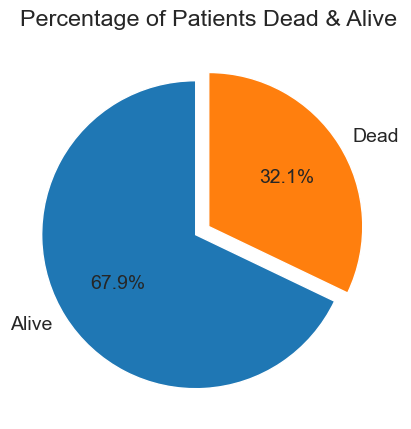

In [238]:
plt.figure(figsize=(12, 5))
plt.pie(dead_counts, labels = ['Alive', 'Dead'] , autopct ='%.1f%%', startangle = 90, explode=[0.1, 0]) 
plt.title("Percentage of Patients Dead & Alive");

- We can observe that 32.1% of the patients are dead during the follow up check up due to CVD. Thats 96 deaths and 203 patients with CVD's alive.

## Number of patients per death event and gender

In [239]:
# Number of patients dead per gender
final_merged_df.groupby(['sex'])['death'].value_counts()

sex     death
Female  False     71
        True      34
Male    False    132
        True      62
Name: death, dtype: int64

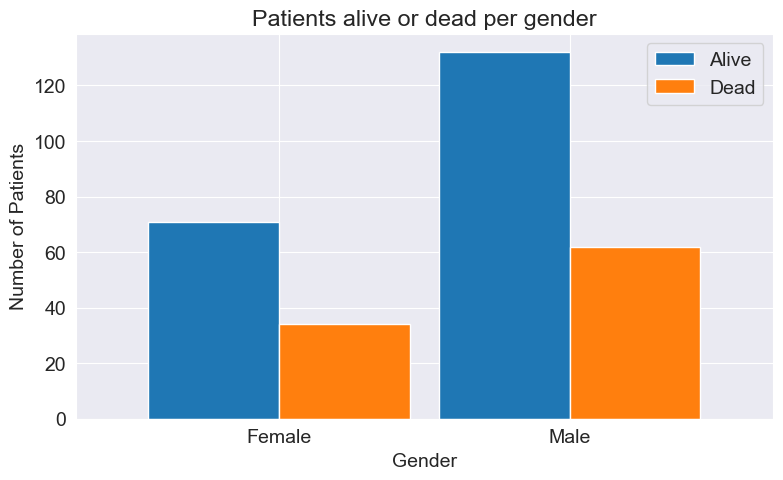

In [240]:
data_grouped = final_merged_df.groupby(['sex', 'death']).size()
data_grouped = data_grouped.unstack(level=-1)
data_grouped.plot.bar(width=0.9)
plt.legend(['Alive', 'Dead'])
plt.title("Patients alive or dead per gender")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.xticks(rotation = 0)
plt.show()

- We can observe that we have 62 deaths patients that are male and 34 deaths patients that are female. 

## Number of patients per death event and age group

In [241]:
age_group_counts = final_merged_df.groupby(['age_group'])['death'].value_counts()
age_group_counts


age_group  death
10-50      False     55
           True      19
50-70      False    127
           True      46
70-80      True      18
           False     16
80-120     True      13
           False      5
Name: death, dtype: int64

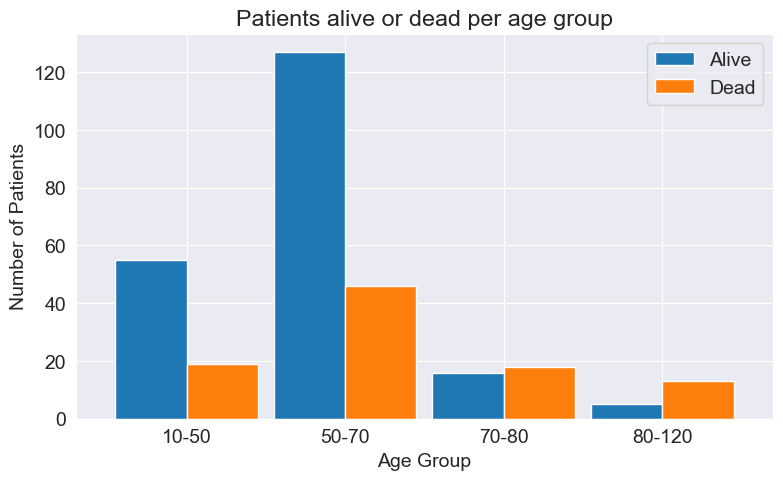

In [242]:
data_grouped = final_merged_df.groupby(['age_group', 'death']).size()
data_grouped = data_grouped.unstack(level=-1)
data_grouped.plot.bar(width=0.9)
plt.legend(['Alive', 'Dead'])
plt.title("Patients alive or dead per age group")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation = 0)
plt.show()


- We can observe here that the majority of deaths are between the ages 50-70, where most of our patients group falls. 

## What is the distribution of sodium Serum and its outliers?

In [243]:
final_merged_df.describe()


,uniqueID,time,age,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,serum_creatinine
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000
mean,149.000000,130.260870,60.833893,38.083612,136.625418,263358.029264,581.839465,1.39388
std,86.458082,77.614208,11.894809,11.834841,4.412477,97804.236869,970.287881,1.03451
min,0.000000,4.000000,40.000000,14.000000,113.000000,25100.000000,23.000000,0.50000
25%,74.500000,73.000000,51.000000,30.000000,134.000000,212500.000000,116.500000,0.90000
50%,149.000000,115.000000,60.000000,38.000000,137.000000,262000.000000,250.000000,1.10000
75%,223.500000,203.000000,70.000000,45.000000,140.000000,303500.000000,582.000000,1.40000
max,298.000000,285.000000,95.000000,80.000000,148.000000,850000.000000,7861.000000,9.40000


In [244]:
serum_sodium = final_merged_df['serum_sodium']

# Calculate quartiles and IQR
quartiles = serum_sodium.describe()
Q1 = quartiles['25%']
Q3 = quartiles['75%']
IQR = Q3 - Q1

# Identify outliers
outliers = serum_sodium[(serum_sodium < (Q1 - 1.5 * IQR)) | (serum_sodium > (Q3 + 1.5 * IQR))]
print(outliers)


4      116
19     121
126    124
199    113
Name: serum_sodium, dtype: int64


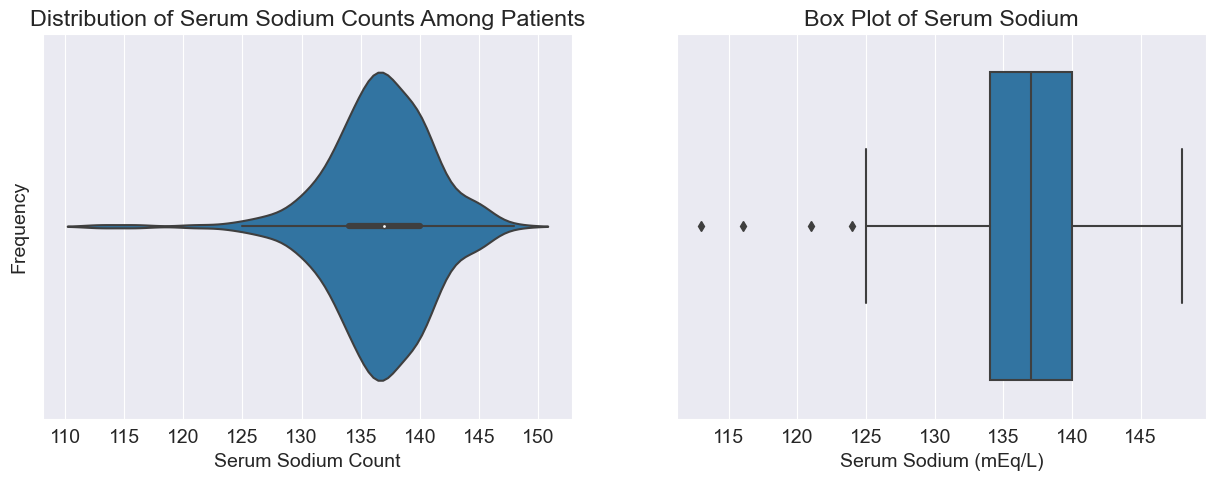

In [245]:
fig = plt.figure(figsize=(15, 5))
# Create the first subplot
plt.subplot(1, 2, 1)
sns.violinplot(x=final_merged_df["serum_sodium"])
plt.title("Distribution of Serum Sodium Counts Among Patients")
plt.xlabel("Serum Sodium Count")
plt.ylabel("Frequency")


# Create the second subplot
plt.subplot(1, 2, 2)
# Verify outliers under serum sodium column
sns.boxplot(x = final_merged_df['serum_sodium'])
plt.xlabel('Serum Sodium (mEq/L)')
plt.title('Box Plot of Serum Sodium')
plt.show()


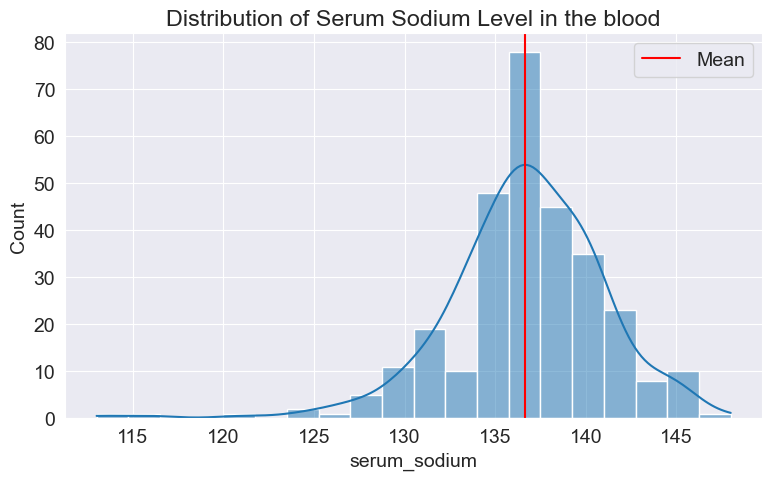

In [246]:
mean_sodium = final_merged_df.serum_sodium.mean()

plt.title("Distribution of Serum Sodium Level in the blood")
sns.histplot(final_merged_df.serum_sodium, kde = True)
plt.axvline(mean_sodium, color='red', label='Mean')
plt.legend()
plt.show()

- A normal blood sodium level is between 135 and 145 milliequivalents per liter (mEq/L). However, we can see that our minimum level is 113 and our maximum level 148 in serum sodium. 
- Mean is 136 meq/L

## What is the platelets Outliers and distribution?

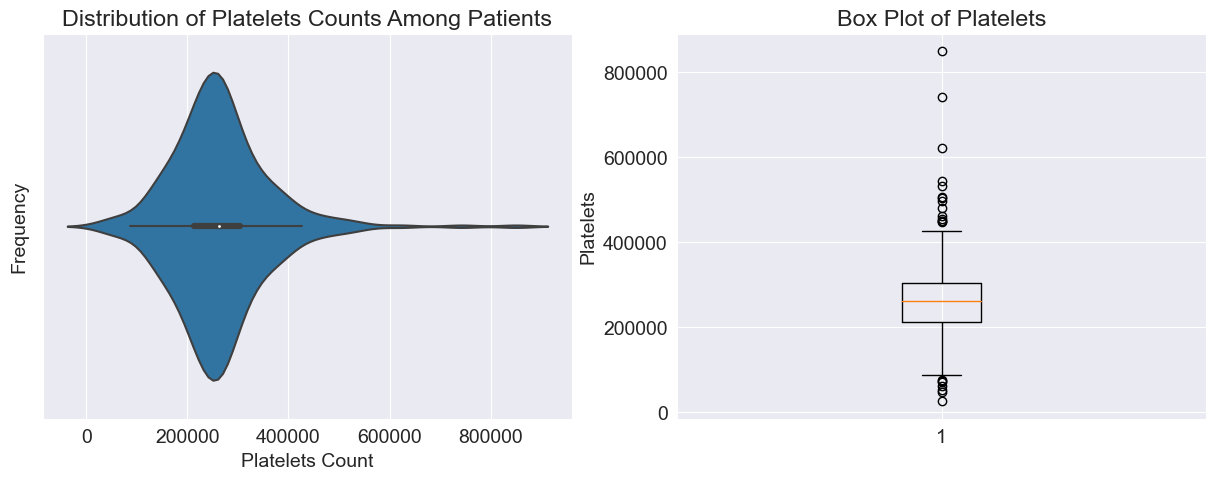

In [247]:
fig = plt.figure(figsize=(15, 5))
# Create the first subplot
plt.subplot(1, 2, 1)
sns.violinplot(x=final_merged_df["platelets"])
plt.title("Distribution of Platelets Counts Among Patients")
plt.xlabel("Platelets Count")
plt.ylabel("Frequency")

# Create the second subplot
plt.subplot(1, 2, 2)
plt.boxplot(final_merged_df['platelets'])
plt.ylabel('Platelets')
plt.title('Box Plot of Platelets')

plt.show()



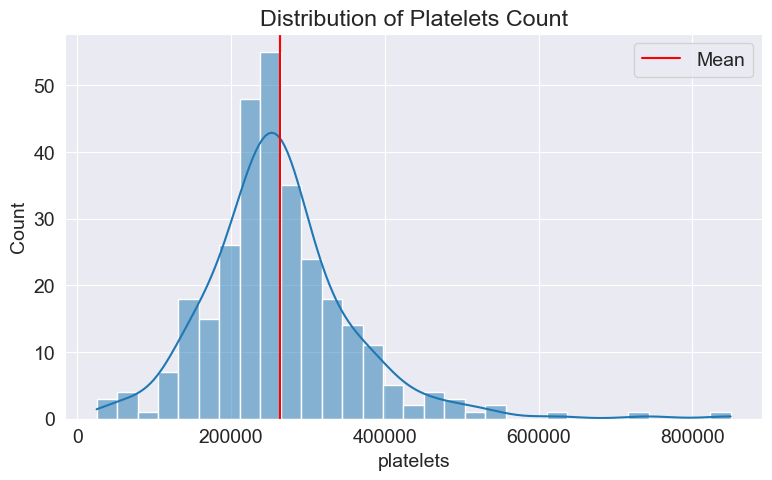

In [248]:
platelets_mean = final_merged_df.platelets.mean()

plt.title("Distribution of Platelets Count") 
sns.histplot(final_merged_df.platelets, kde = True)
plt.axvline(platelets_mean, color='red', label='Mean')
plt.legend()

- A normal platelet count in adults ranges from 150,000 to 450,000 platelets per microliter of blood. A platelet count of less than 150,000 platelets per microliter is lower than normal.
- We can observe in the box plot the outliers a min of 25,100 and a maximum of 850,000.
- The mean of the platelets is 263358.03

## What is the creatinine Phosphokinase Outliers and distribution?

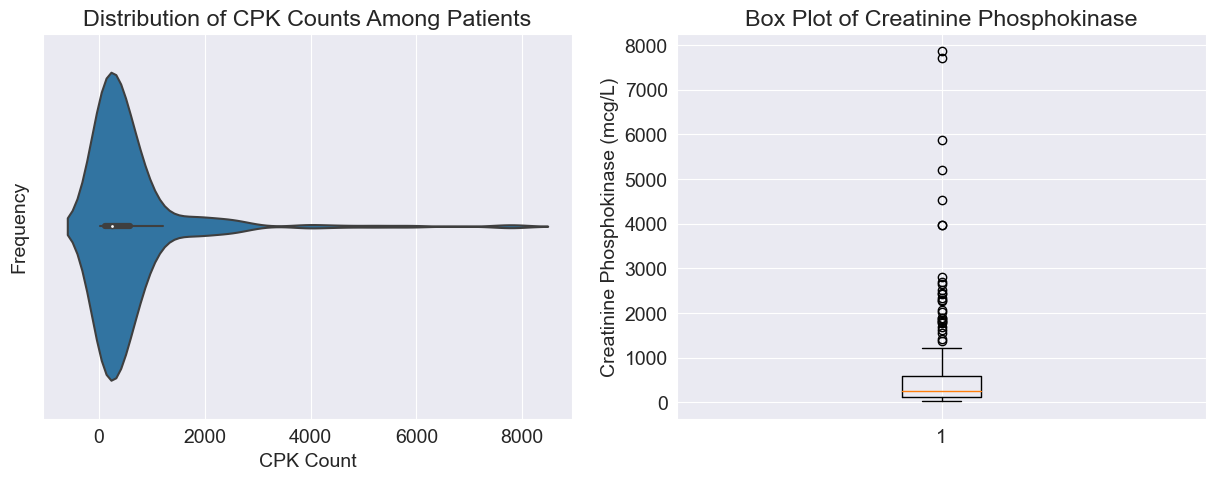

In [249]:
fig = plt.figure(figsize=(15, 5))
# Create the first subplot
plt.subplot(1, 2, 1)
sns.violinplot(x=final_merged_df["creatinine_phosphokinase"])
plt.title("Distribution of CPK Counts Among Patients")
plt.xlabel("CPK Count")
plt.ylabel("Frequency")

# Create the second subplot

plt.subplot(1, 2, 2)
plt.boxplot(final_merged_df['creatinine_phosphokinase'])
plt.ylabel('Creatinine Phosphokinase (mcg/L)')
plt.title('Box Plot of Creatinine Phosphokinase')
plt.show()

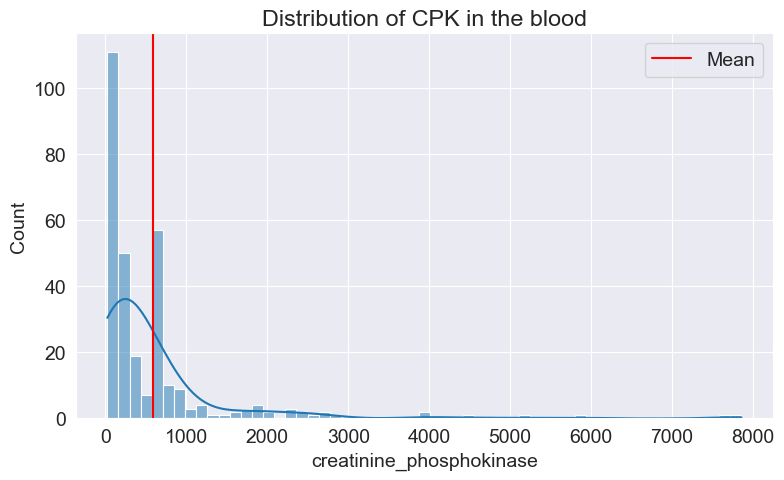

In [250]:
cpk_mean = final_merged_df.creatinine_phosphokinase.mean()

plt.title("Distribution of CPK in the blood") 
sns.histplot(final_merged_df.creatinine_phosphokinase, kde = True)
plt.axvline(cpk_mean, color='red', label='Mean')
plt.legend()

- Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)
- We have a minimum of 23 CPK and a maximum of 7861 CPK
- The outlier is represented in the maximum value
- Mean of CPK is 582 mcg/L

## What is the serum Creatinine Outliers and distribution?

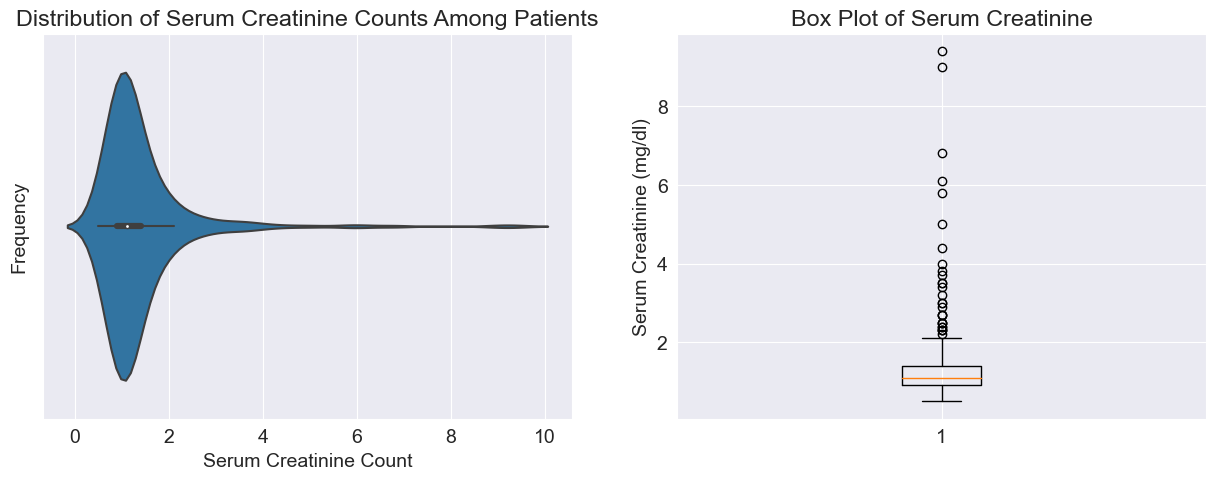

In [251]:
fig = plt.figure(figsize=(15, 5))
# Create the first subplot
plt.subplot(1, 2, 1)
sns.violinplot(x=final_merged_df["serum_creatinine"])
plt.title("Distribution of Serum Creatinine Counts Among Patients")
plt.xlabel("Serum Creatinine Count")
plt.ylabel("Frequency")

# Create the second subplot

plt.subplot(1, 2, 2)
plt.boxplot(final_merged_df['serum_creatinine'])
plt.ylabel('Serum Creatinine (mg/dl)')
plt.title('Box Plot of Serum Creatinine')
plt.show()

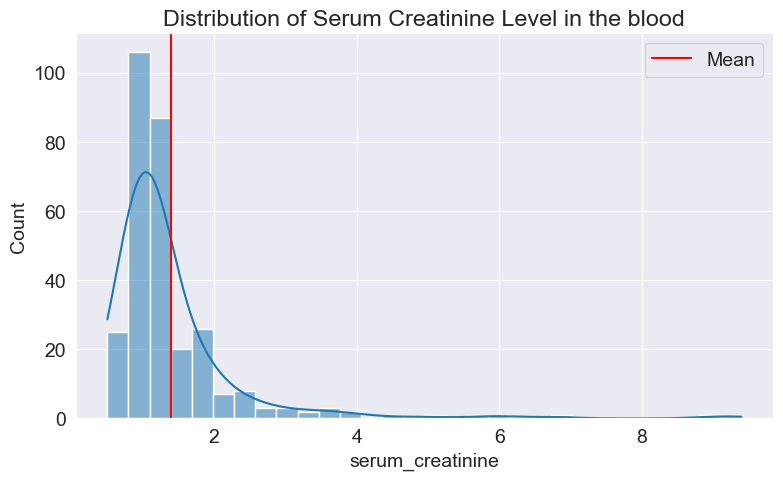

In [252]:
serum_cre_mean = final_merged_df.serum_creatinine.mean()

plt.title("Distribution of Serum Creatinine Level in the blood") 
sns.histplot(final_merged_df.serum_creatinine, kde = True, bins = 30)
plt.axvline(serum_cre_mean, color='red', label='Mean')
plt.legend()

- The typical range for serum creatinine is: For adult men, 0.74 to 1.35 mg/dL (65.4 to 119.3 micromoles/L) For adult women, 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L)
- The distribution of the serum creatinine is between 0.5 and 9.4.
- The mean of serum creatinine is 1.39 mg/L

## Serum Creatinine per Gender

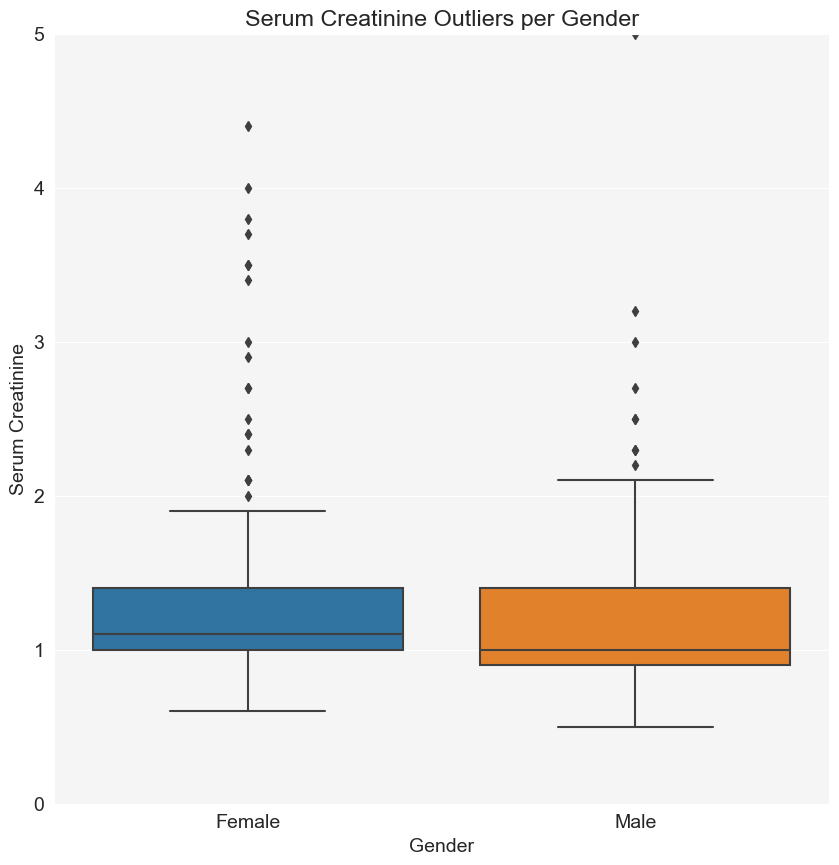

In [253]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='sex', y='serum_creatinine', data=final_merged_df, ax=ax)

ax.set_xlabel('Gender')
ax.set_ylabel('Serum Creatinine')
ax.set_title('Serum Creatinine Outliers per Gender')

ax.set_ylim(0,5)
ax.set_xticklabels(['Female', 'Male'])
ax.set_facecolor('#f5f5f5')

# Show the plot
plt.show()


## What is the number of patients with abnormal metrics?

In [254]:
#create columns to indicate the abnormalities 
final_merged_df['abnormal_platelets'] = np.where(((final_merged_df.platelets >= 150000) & (final_merged_df.platelets <= 400000)) , 'Normal', 'Abnormal')
final_merged_df['abnormal_creatinine'] = np.where(((final_merged_df.serum_creatinine >= 0.6) & (final_merged_df.serum_creatinine <= 1.3)), 'Normal','Abnormal')
final_merged_df['abnormal_sodium'] = np.where(((final_merged_df.serum_sodium >= 135) & (final_merged_df.serum_sodium <= 145)) , 'Normal', 'Abnormal') 
final_merged_df['abnormal_CPK'] = np.where(((final_merged_df.creatinine_phosphokinase >= 10) & (final_merged_df.creatinine_phosphokinase <= 120)) , 'Normal', 'Abnormal') 

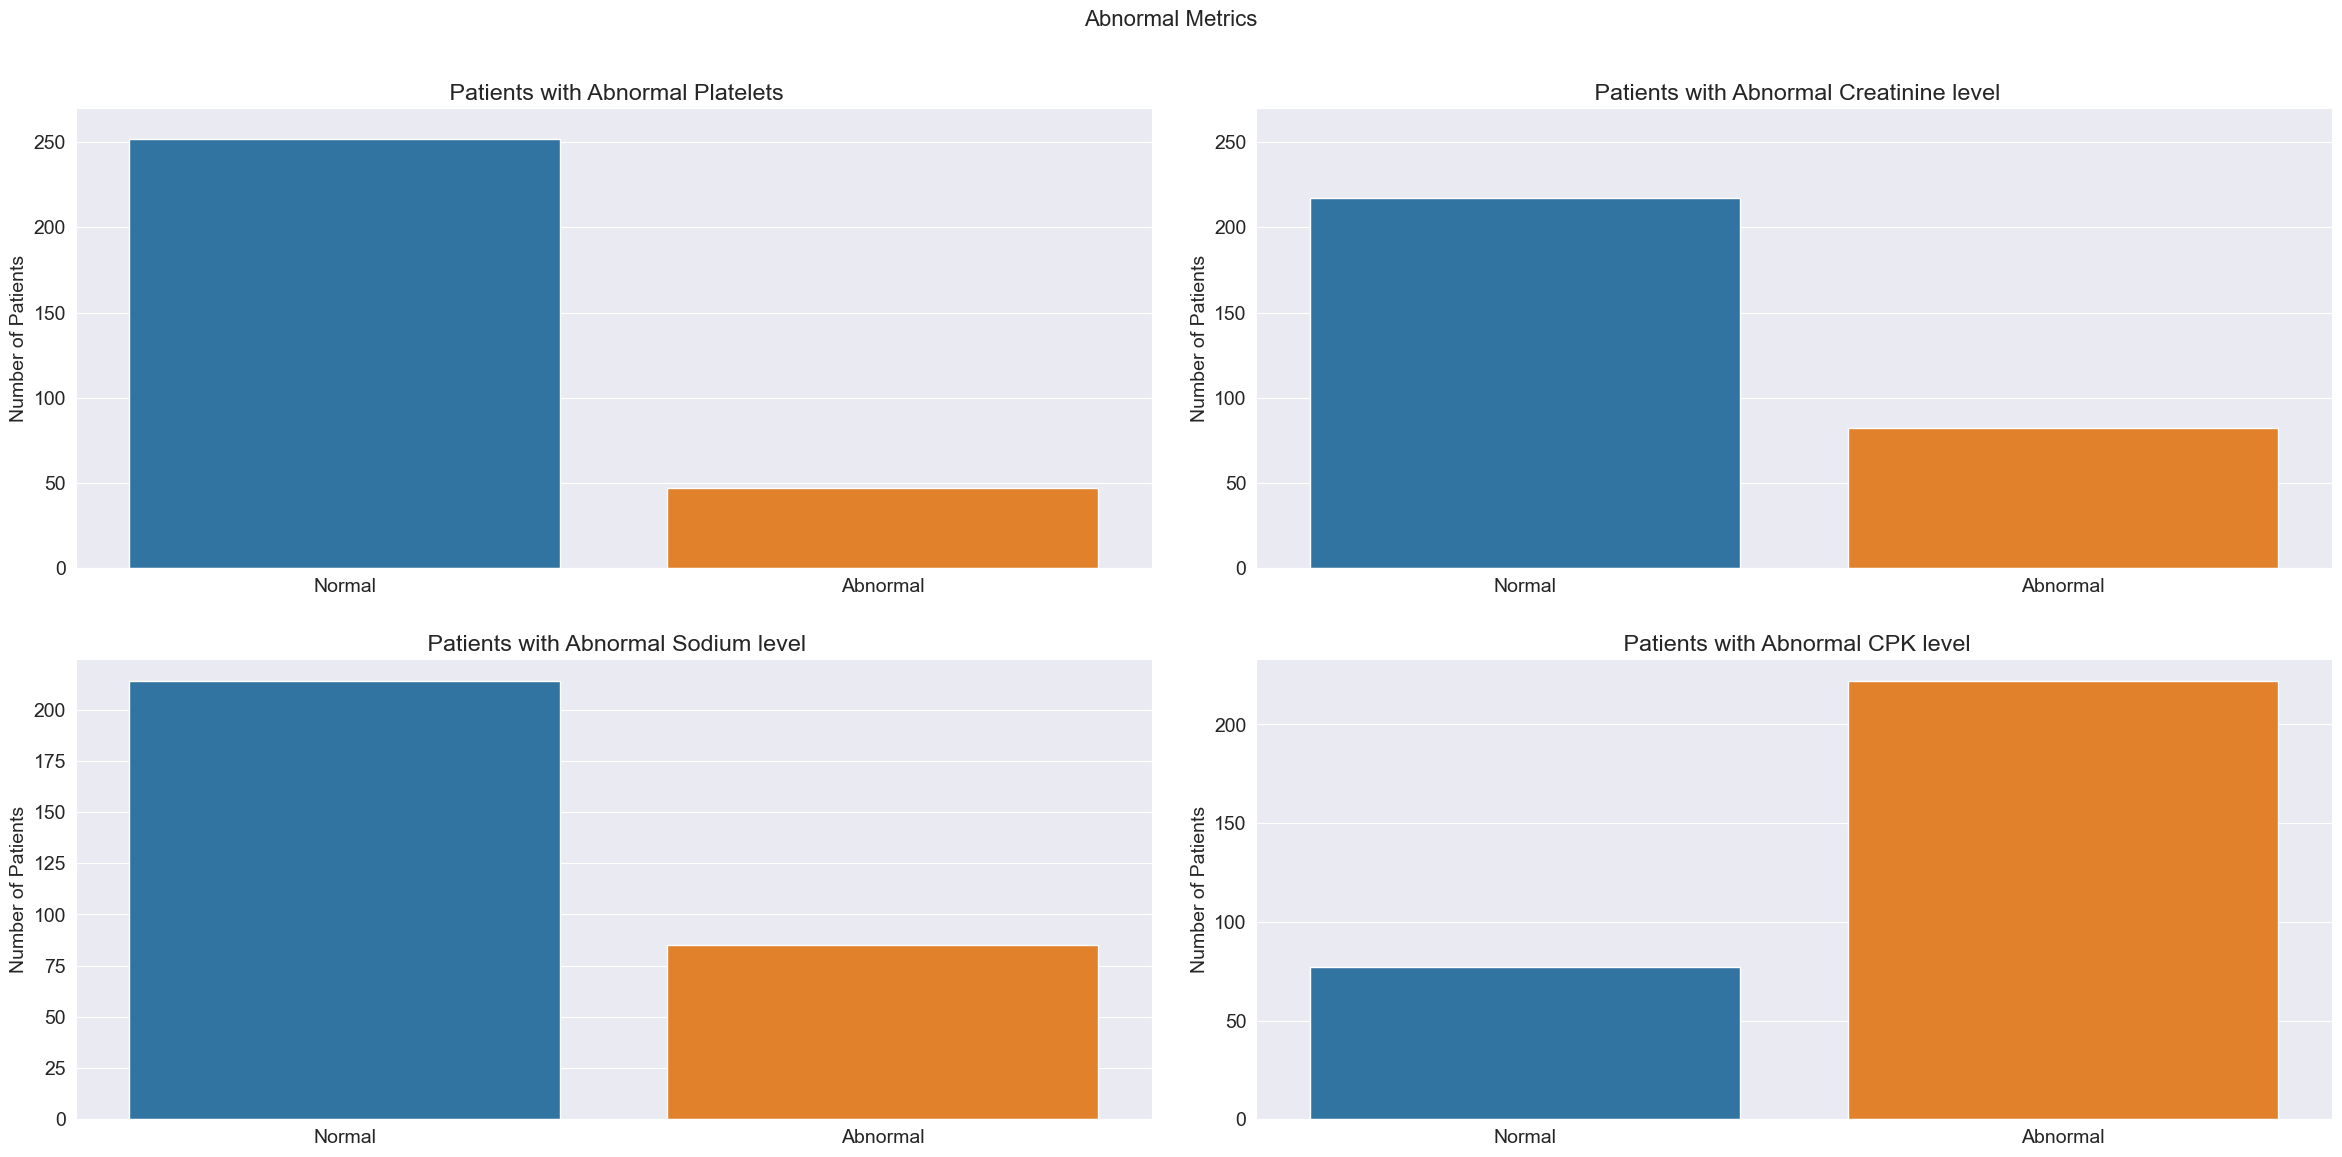

In [255]:
fig, axis = plt.subplots(2, 2, figsize=(24,12))

# Platelets count 
axis[0,0].set_title(" Patients with Abnormal Platelets")
sns.countplot(x = final_merged_df.abnormal_platelets.sort_values(ascending =False) , ax=axis[0,0])
axis[0,0].set_xlabel("")
axis[0,0].set_ylabel("Number of Patients")
axis[0,0].set_ylim([0, 270])

# Creatinine level 
axis[0,1].set_title(" Patients with Abnormal Creatinine level")
sns.countplot(x = final_merged_df.abnormal_creatinine.sort_values(ascending =False), ax=axis[0,1])
axis[0,1].set_xlabel("")
axis[0,1].set_ylabel("Number of Patients")
axis[0,1].set_ylim([0, 270])

# Sodium Creatinine 
axis[1,0].set_title(" Patients with Abnormal Sodium level")
sns.countplot(x = final_merged_df.abnormal_sodium.sort_values(ascending =False), ax=axis[1,0])
axis[1,0].set_xlabel("")
axis[1,0].set_ylabel("Number of Patients")
axis[1,0].set

# Creatinine phosphokinase
axis[1,1].set_title(" Patients with Abnormal CPK level")
sns.countplot(x = final_merged_df.abnormal_CPK.sort_values(ascending =False), ax=axis[1,1])
axis[1,1].set_xlabel("")
axis[1,1].set_ylabel("Number of Patients")
axis[1,1].set

plt.suptitle("Abnormal Metrics", fontsize=16)

plt.tight_layout(pad=2);

- We can observe that the creatinine phosphokinase levels is the most frequent factor for patients with heart failure. This is followed by serum sodium levels.  

## What is the number of patients with Anemia, Diabetes, HBP and Smoking habit?

(0.0, 220.0)

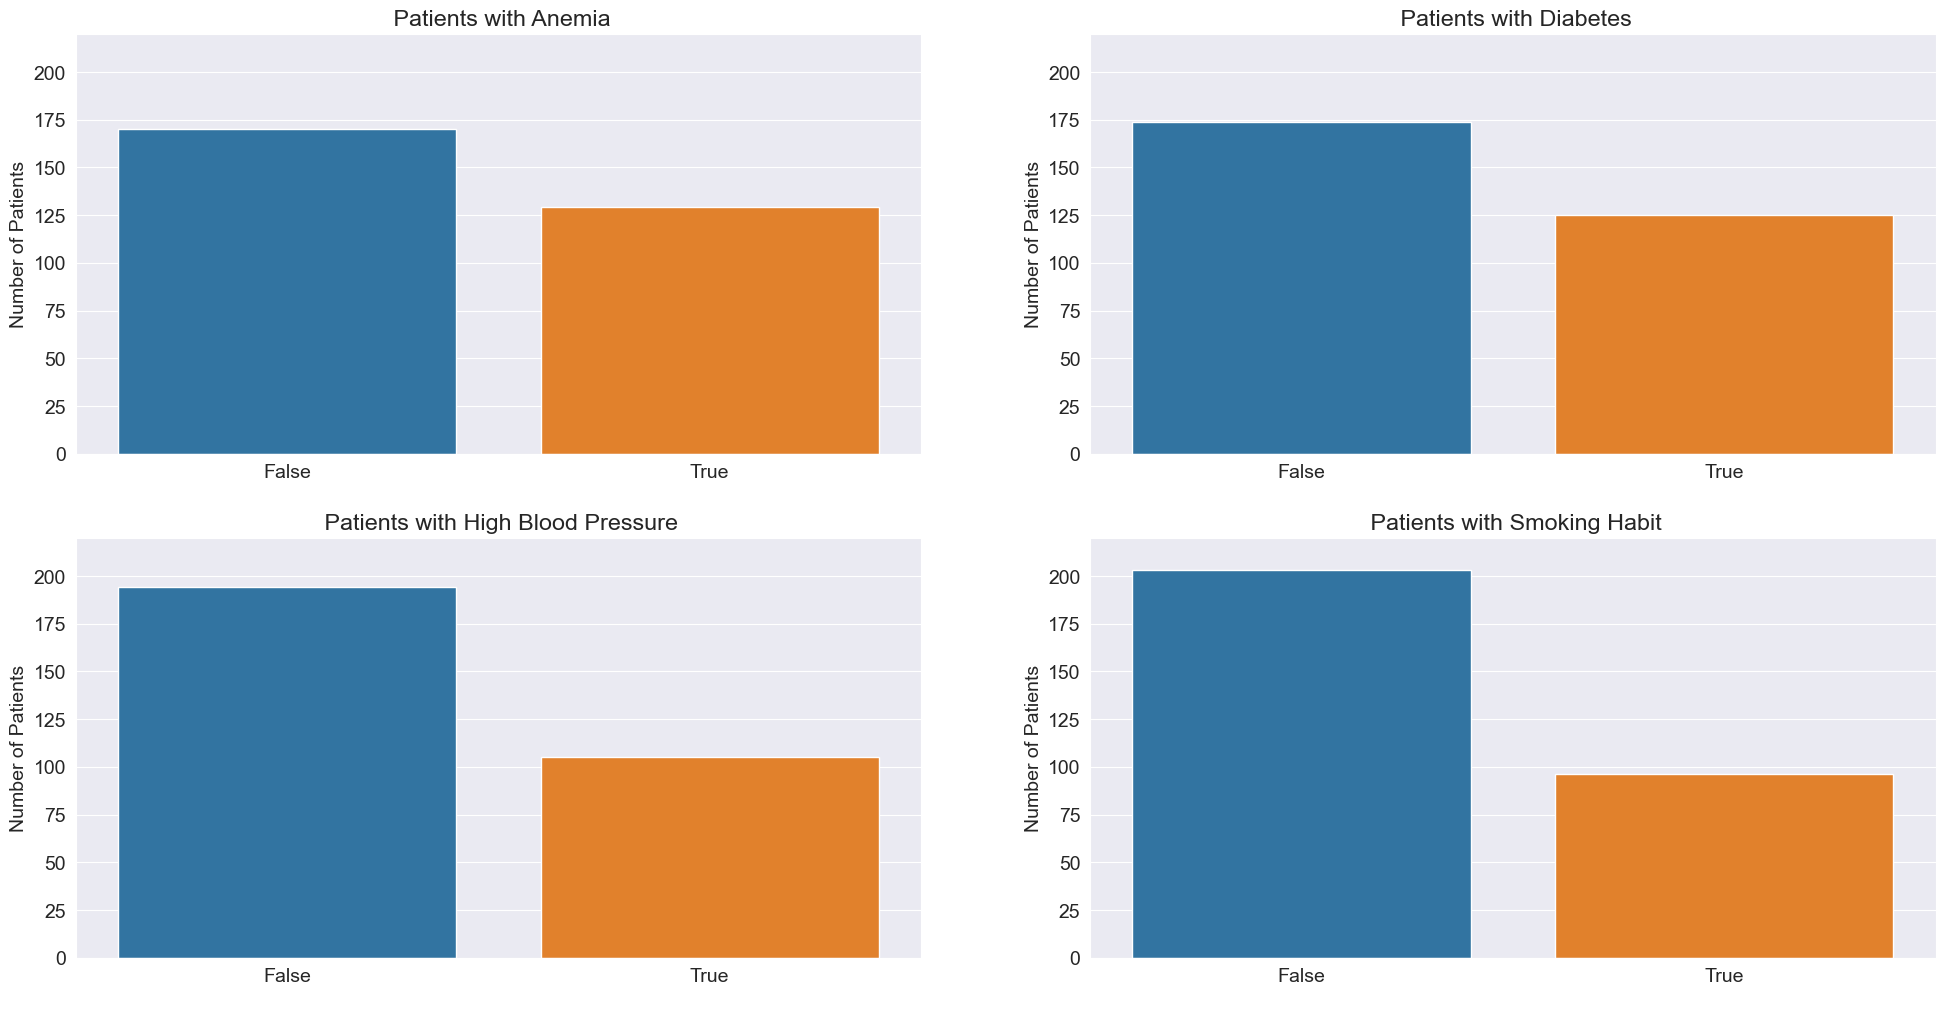

In [256]:
fig, axis = plt.subplots(2,2, figsize =(24, 12)) 

#axis(0,0) use this axis for Anaemia 
axis[0,0].set_title(" Patients with Anemia")
sns.countplot(x = final_merged_df.anemia, ax=axis[0,0] )
axis[0,0].set_xlabel("")
axis[0,0].set_ylabel("Number of Patients")
axis[0,0].set_ylim([0, 220])

#axis(0,1) use this axis for Diabetes 
axis[0,1].set_title(" Patients with Diabetes")
sns.countplot(x = final_merged_df.diabetes, ax=axis[0,1])
axis[0,1].set_xlabel("")
axis[0,1].set_ylabel("Number of Patients")
axis[0,1].set_ylim([0, 220])


#axis(1,0) use this axis for High blood pressure 
axis[1,0].set_title(" Patients with High Blood Pressure")
sns.countplot(x = final_merged_df.high_blood_pressure, ax=axis[1,0])
axis[1,0].set_xlabel("")
axis[1,0].set_ylabel("Number of Patients")
axis[1,0].set_ylim([0, 220])

#axis(0,3) use this axis for smoking habit 
axis[1,1].set_title(" Patients with Smoking Habit")
sns.countplot(x = final_merged_df.smoking, ax=axis[1,1])
axis[1,1].set_xlabel(" ")
axis[1,1].set_ylabel("Number of Patients")
axis[1,1].set_ylim([0, 220])


- The number one factor in this dataset for patients with heart failure is Anemia, followed by Diabetes. 
- Interesting enough, smoking habits is not the number one factor in this dataset

# A short summary of your findings

In this dataset, we analyzed the characteristics of patients with heart failure. The average age of these patients is 61 years old. We found that 64.9% of the patients are male and 35.1% are female. Our findings show that 32.1% of patients with heart failure died during the follow-up period. The majority of deaths occurred in patients between the ages of 50 and 70.

We also looked at various laboratory measurements in these patients, including serum sodium levels, platelet counts, and creatinine phosphokinase levels. We found that the normal range for serum sodium is between 135 and 145 mEq/L, however, our dataset shows a minimum level of 113 and a maximum level of 148. A normal platelet count in adults ranges from 150,000 to 450,000 platelets per microliter of blood, but we found a minimum count of 25,100 and a maximum count of 850,000 in our dataset. The typical range for serum creatinine is 0.74 to 1.35 mg/dL for men and 0.59 to 1.04 mg/dL for women, but we found values between 0.5 and 9.4 in our dataset.

We also analyzed the most common factors associated with heart failure in this dataset. Our findings show that the most frequent factor is anemia, followed by diabetes. Interestingly, smoking habits were not found to be the main factor in this dataset. Overall, our analysis provides a detailed overview of the characteristics and laboratory measurements of patients with heart failure in this dataset.






## Verify relation between the different numeric values

In [257]:
corr = final_merged_df[['age', 'platelets', 'serum_creatinine', 'serum_sodium', 'creatinine_phosphokinase']].corr()

corr

,age,platelets,serum_creatinine,serum_sodium,creatinine_phosphokinase
age,1.000000,-0.052354,0.159187,-0.045966,-0.081584
platelets,-0.052354,1.000000,-0.041198,0.062125,0.024463
serum_creatinine,0.159187,-0.041198,1.000000,-0.189095,-0.016408
serum_sodium,-0.045966,0.062125,-0.189095,1.000000,0.059550
creatinine_phosphokinase,-0.081584,0.024463,-0.016408,0.059550,1.000000


Text(0.5, 1.0, 'Correlation between numeric values')

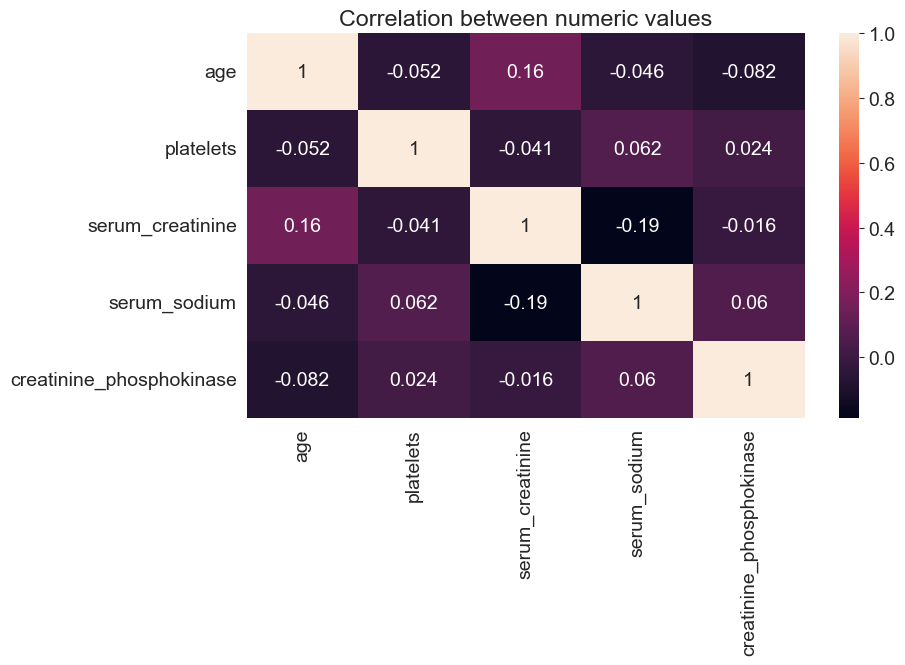

In [258]:
sns.heatmap(corr, annot=True)
plt.title('Correlation between numeric values')

-A correlation coefficient of -0.082 for 'age' and 'creatinine phosphokinase' indicates a very weak negative correlation. This means that as age increases, there is a slight decrease in the level of creatinine phosphokinase.

-A correlation of -0.046 between age and serum sodium means that there is a very weak negative correlation between the two variables. This means that as age increases, serum sodium levels tend to decrease slightly, but the relationship is not very strong.

-On the other hand, we can observe a weak positive correlation between plateles and serum sodium. As platelets increase, serum sodium tends to also increase, but the relationship is not very strong.

-We can see the same with serum phosphokinase and platelets

# Data Enrichment

If I had unlimited resources, budget, and anything I need, I would enrich the existing data in the following ways:

- Since we have imbalance data between females and males, I suggest to create a sample to analyze the data and how affect CVD's between gender. 

- Incorporate demographic data such as country, level or education, income. This could help us understand how it relates to CVD's. 

- I would conduct surveys on a larger and more diverse sample to gather more information on the variables of interest.

- I would gather additional data to get a more comprehensive understanding of the patients’ medical history, including their health conditions, treatments, and outcomes.

- I would gather more information on lifestyle factors, such as exercise, diet, and smoking habits, to determine their impact on CVD's.


By enriching the existing data, we would be able to gain a deeper understanding of heart disease, which could help in developing better prevention and treatment strategies.






In [259]:
# Let's see the head of base_metrics in a more visualized manner
base_metrics_patient_df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

smoking,ejection_fraction,serum_sodium,platelets,creatinine_phosphokinase,uniqueID,diabetes,serum_creatinine
0,20,130,265000.000000,582,0,0,1.900000
0,38,136,263358.030000,7861,1,0,1.100000
1,20,129,162000.000000,146,2,0,1.300000
0,20,137,210000.000000,111,3,0,1.900000
0,20,116,327000.000000,160,4,1,2.700000


In [260]:
# Descriptive statistics in a more visualized way
base_metrics_patient_df.describe().T.style.background_gradient(cmap = "Reds_r").set_properties(**{"font-family" : "Segoe UI"})

,count,mean,std,min,25%,50%,75%,max
smoking,299.000000,0.321070,0.467670,0.000000,0.000000,0.000000,1.000000,1.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
uniqueID,299.000000,149.000000,86.458082,0.000000,74.500000,149.000000,223.500000,298.000000
diabetes,299.000000,0.418060,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000


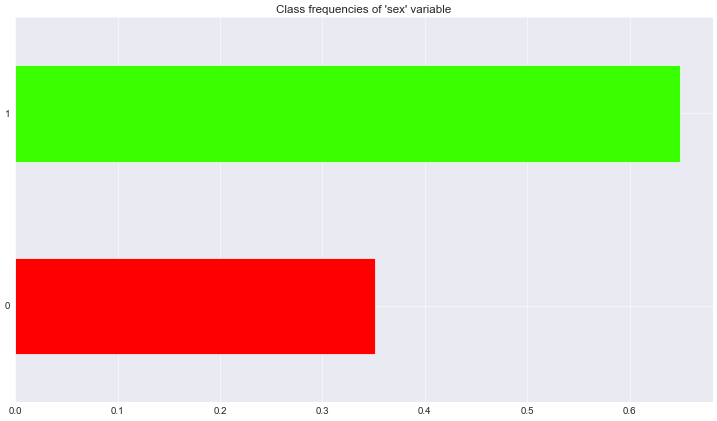

In [261]:
# Let's see the relationship between categoric variable "sex" and its frequency
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

(demographic_df["sex"].value_counts(ascending = True, normalize = True)
 .plot.barh(color= ["#FF0000", "#3AFF00"])
 .set_title("Class frequencies of 'sex' variable"));

# Q: Why do we have values besides 1 / 0 ???

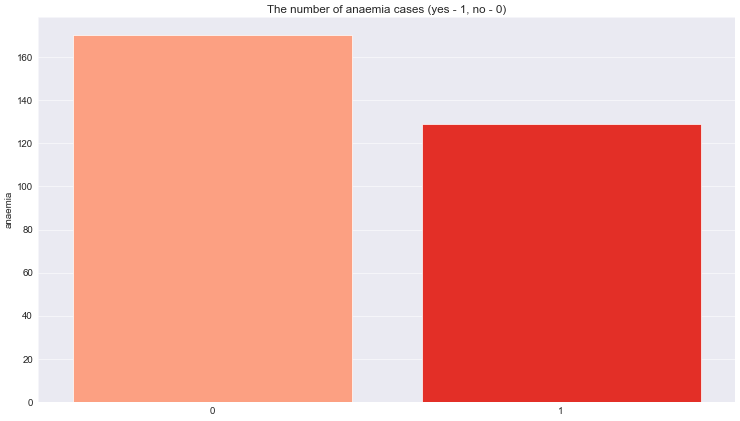

In [262]:
plt.figure(figsize = (18, 10), dpi = 50, edgecolor = "black")

sns.barplot(x = blood_metrics_df["anaemia"].value_counts().index,
            y = blood_metrics_df["anaemia"].value_counts(),
            data = blood_metrics_df, palette = "Reds",
            saturation = 1).set(title = "The number of anaemia cases (yes - 1, no - 0)");

# It can be seen from this graph that the presence of anemia is less than the absence
# Why do we have other values?